# Density of water #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## IAPWS IF97 ##

Water density is calculated using the *Revised Release on the IAPWS Industrial Formulation 1997 for the Thermodynamic Properties of Water and Steam*.

Read in data obtained from NIST webbook (http://webbook.nist.gov/chemistry/fluid/).

In [4]:
colnames = ['Pressure', 'Density']
nist_data = pd.read_csv('gold/water_density_nist_t200.csv', header=None, names=colnames)

Read in the MOOSE data.

In [5]:
moose_data = pd.read_csv('../../../../../tests/userobjects/FluidProperties/water/gold/WaterProperty_density_vpp_0001.csv')

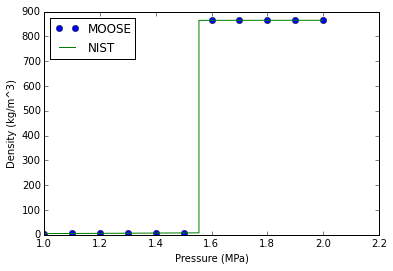

In [6]:
plt.plot((1+0.5* moose_data.x), moose_data.WaterPropertyAuxVariable,'o', label='MOOSE')
plt.plot(nist_data.Pressure, nist_data.Density, label='NIST')
plt.legend(loc='upper left')
plt.xlabel('Pressure (MPa)')
plt.ylabel('Density (kg/m^3)')

## Derivative of water density in region 1. ##

Read in data obtained from NIST webbook (http://webbook.nist.gov/chemistry/fluid/).

In [7]:
nist_data = pd.read_csv('gold/water_properties_nist_t50.txt', delimiter='\t', header=None)

Read in the MOOSE data.

In [8]:
moose_data = pd.read_csv('../../../../../tests/userobjects/FluidProperties/water/gold/WaterProperty_region1_dDensitydP_vpp_0001.csv')

Construct a density profile using the initial NIST density value, and the gradient given by the MOOSE derivative.

In [9]:
rho0=988.03
mdensity = np.zeros(len(moose_data))
mdensity[0] = rho0;
psteps = np.ediff1d(0.1e6*(10**moose_data.x))

for i in range(1,len(moose_data)) :
    mdensity[i] = mdensity[i-1] + moose_data.WaterPropertyAuxVariable[i-1] * psteps[i-1]

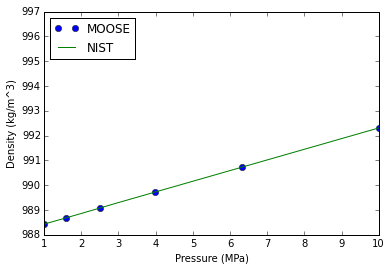

In [10]:
plt.plot(0.1*(10**moose_data.x), mdensity,'o', label='MOOSE')
plt.plot(nist_data.icol(1), nist_data.icol(2), label='NIST')
plt.legend(loc='upper left')
plt.xlabel('Pressure (MPa)')
plt.ylabel('Density (kg/m^3)')
plt.xlim([1,10]);

## Derivative of water density in region 1. ##

Read in data obtained from NIST webbook (http://webbook.nist.gov/chemistry/fluid/).

In [11]:
nist_data = pd.read_csv('gold/water_properties_nist_t350.txt', delimiter='\t', header=None)

Read in the MOOSE data.

In [12]:
moose_data = pd.read_csv('../../../../../tests/userobjects/FluidProperties/water/gold/WaterProperty_region2_dDensitydP_vpp_0001.csv')

In [18]:
np.gradient(moose_data.WaterPropertyAuxVariable, 0.2) / np.gradient

array([  3.59666304e-08,   4.67119010e-08,   7.48420079e-08,
         1.20706478e-07,   1.96796801e-07,   3.26693644e-07,
         5.59232744e-07,   1.01007564e-06,   2.01423088e-06,
         4.99032535e-06,   7.26285452e-06])

In [19]:
nist_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,350,0.0,0.00000,infinite,52.067,57.248,501.20,28.276,36.590,610.05,undefined,22.378,0.048848,vapor
1,350,0.1,0.34832,2.8710,52.041,57.213,151.09,28.352,36.749,609.48,9.4036,22.371,0.048967,vapor
2,350,0.2,0.69785,1.4330,52.016,57.179,145.28,28.429,36.909,608.92,9.4074,22.364,0.049086,vapor
3,350,0.3,1.04860,0.95363,51.990,57.144,141.87,28.508,37.072,608.34,9.4110,22.357,0.049206,vapor
4,350,0.4,1.40060,0.71396,51.964,57.109,139.44,28.587,37.238,607.77,9.4142,22.351,0.049327,vapor
5,350,0.5,1.75390,0.57015,51.938,57.074,137.54,28.667,37.405,607.19,9.4171,22.344,0.049448,vapor
6,350,0.6,2.10850,0.47427,51.912,57.039,135.98,28.748,37.575,606.61,9.4198,22.338,0.049570,vapor
7,350,0.7,2.46430,0.40579,51.886,57.003,134.66,28.830,37.747,606.03,9.4222,22.331,0.049693,vapor
8,350,0.8,2.82150,0.35442,51.859,56.967,133.50,28.913,37.922,605.44,9.4242,22.325,0.049817,vapor
9,350,0.9,3.18000,0.31447,51.833,56.932,132.48,28.997,38.099,604.86,9.4260,22.318,0.049942,vapor


Construct a density profile using the initial NIST density value, and the gradient given by the MOOSE derivative.

In [13]:
rho0=0.34832
mdensity = np.zeros(len(moose_data))
mdensity[0] = rho0;
psteps = np.ediff1d(0.1e6*(10**moose_data.x))

for i in range(1,len(moose_data)) :
    mdensity[i] = mdensity[i-1] + moose_data.WaterPropertyAuxVariable[i-1] * psteps[i-1]

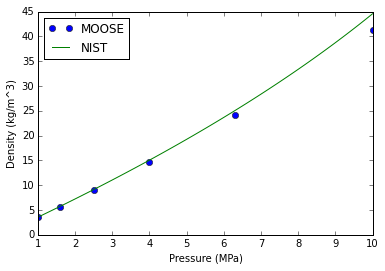

In [14]:
plt.plot(0.1*(10**moose_data.x), mdensity,'o', label='MOOSE')
plt.plot(nist_data.icol(1), nist_data.icol(2), label='NIST')
plt.legend(loc='upper left')
plt.xlabel('Pressure (MPa)')
plt.ylabel('Density (kg/m^3)')
plt.xlim([1,10]);

Compare the MOOSE results for density in region 2

In [127]:
moose_data = pd.read_csv('gold/WaterProperty_region2_density4_vpp_0001.csv')

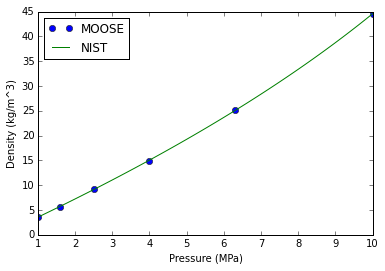

In [128]:
plt.plot(0.1*(10**moose_data.x), moose_data.WaterPropertyAuxVariable,'o', label='MOOSE')
plt.plot(nist_data.icol(1), nist_data.icol(2), label='NIST')
plt.legend(loc='upper left')
plt.xlabel('Pressure (MPa)')
plt.ylabel('Density (kg/m^3)')
plt.xlim([1,10]);